# Import biblioteca




In [43]:
import math
import numpy  as np
import pandas as pd
from IPython.core.display  import HTML
import seaborn as sns


import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score


# Função Extra 

In [2]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)

# Import Dataset

In [3]:
url = 'https://github.com/alura-cursos/imersao-dados-desafio-final/blob/main/Dados/dados_resultados.csv?raw=true'

df = pd.read_csv(url)


# dados

url = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

df2 = pd.read_csv(url, compression ='zip')



# Conhecendo dados

In [4]:
print(df.shape[0], 'linhas')
print(df.shape[1], 'colunas')

23814 linhas
207 colunas


In [5]:
df.dtypes

id                                       object
5-alpha_reductase_inhibitor               int64
11-beta-hsd1_inhibitor                    int64
acat_inhibitor                            int64
acetylcholine_receptor_agonist            int64
                                          ...  
ubiquitin_specific_protease_inhibitor     int64
vegfr_inhibitor                           int64
vitamin_b                                 int64
vitamin_d_receptor_agonist                int64
wnt_inhibitor                             int64
Length: 207, dtype: object

In [6]:
#As duas formas são iguais, depende da facilidade

#contagem = df.select_dtypes('int64').sum().sort_values(ascending = False)
contagem = df.drop('id', axis = 1).sum().sort_values(ascending = False)
contagem

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
elastase_inhibitor                              6
steroid                                         6
atm_kinase_inhibitor                            6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

In [7]:
#Contagem de linhas que foram ativadas
df['n_moa'] = df.drop('id', axis = 1).sum( axis = 1)

In [8]:
df['n_moa_ative'] = df['n_moa'] != 0

# Merge 

In [9]:
df_merge = pd.merge(df[['id','n_moa', 'n_moa_ative']], df2, on = 'id')
df_merge.head(2)

,id,n_moa,n_moa_ative,tratamento,tempo,dose,droga,g-0,g-1,g-2,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,1,True,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,0,False,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371


In [10]:
df_merge.loc[df_merge['tratamento'] == 'com_controle']['n_moa_ative'].value_counts()

False    1866
Name: n_moa_ative, dtype: int64

In [11]:
df_merge.drop('id', axis = 1)


df_merge['eh_controle'] = df_merge['tratamento'] == 'com_controle'

In [12]:
df_merge

,id,n_moa,n_moa_ative,tratamento,tempo,dose,droga,g-0,g-1,g-2,...,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,eh_controle
0,id_000644bb2,1,True,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,...,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,False
1,id_000779bfc,0,False,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,...,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,False
2,id_000a6266a,3,True,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,...,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,False
3,id_0015fd391,0,False,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,...,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,False
4,id_001626bd3,1,True,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,...,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,1,True,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,...,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680,False
23810,id_fffb70c0c,1,True,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,...,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689,False
23811,id_fffc1c3f4,0,False,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,...,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808,True
23812,id_fffcb9e7c,1,True,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,...,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740,False


In [13]:
principais_compostos = df_merge['droga'].value_counts().index[:5]


<AxesSubplot:xlabel='droga', ylabel='g-0'>

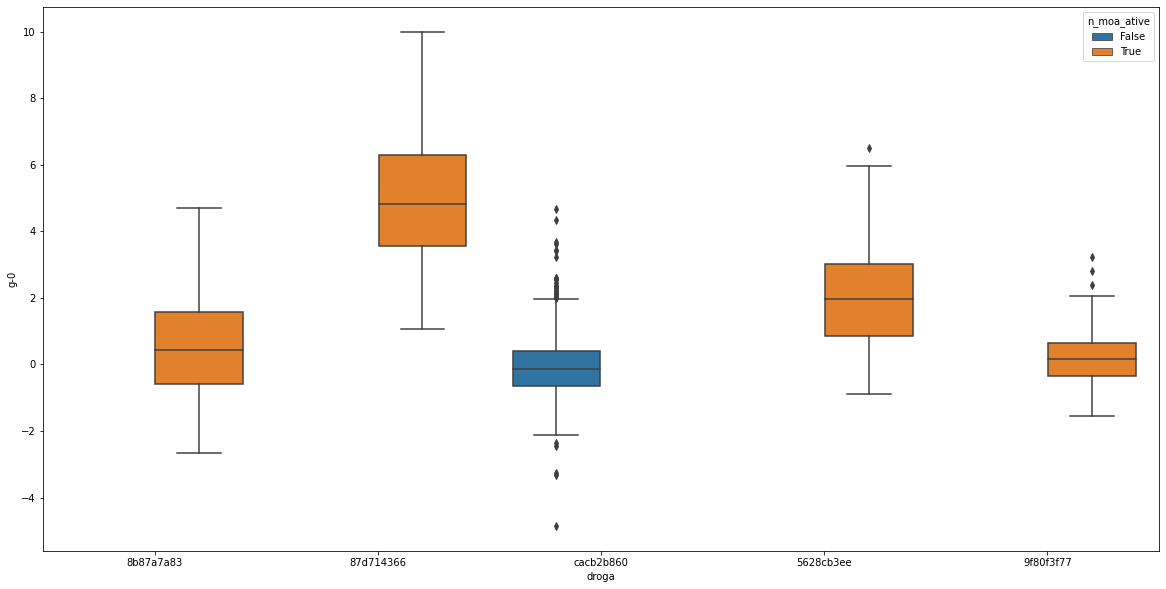

In [14]:
sns.boxplot(x = 'droga', y = 'g-0', data = df_merge.query('droga in @principais_compostos'), hue = 'n_moa_ative' )

# Machine Learning

## regressão logística

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [41]:
#separando x e y e aplicando train_test para separar em teste e treino
x = df_merge.select_dtypes('float64')
y =  df_merge['n_moa_ative']
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.2, random_state = 42, stratify = y)

In [45]:
modelo_rlogistica = LogisticRegression(max_iter = 1000)
modelo_rlogistica.fit(x_treino ,y_treino)

#resultado

modelo_rlogistica.score(x_teste, y_teste)

0.6353138778081041

## Modelo simples (dummy)

In [46]:
#comparação entre modelos mais simples (fala sim pra todo mundo)

modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
accuracy_score(y_teste, previsao_dummy)

/home/user/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass strategy=most_frequent as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


0.6067604450976275

## Árvore de decisão 

In [18]:
x = df_merge.select_dtypes('float64')
y =  df_merge['n_moa_ative']
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.2, random_state = 42, stratify = y)

modelo_arvore = DecisionTreeClassifier(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
modelo_arvore.score(x_teste, y_teste)

0.6235565819861432

## Aumentar os nós

In [20]:
x = df_merge.select_dtypes('float64')
y =  df_merge['n_moa_ative']
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.2, random_state = 42, stratify = y)

teste = []
treino = []

for i in range(1,15):
    modelo_arvore = DecisionTreeClassifier(max_depth = i)
    modelo_arvore.fit(x_treino, y_treino)
    teste.append(modelo_arvore.score(x_teste, y_teste))
    treino.append(modelo_arvore.score(x_treino, y_treino))

<AxesSubplot:>

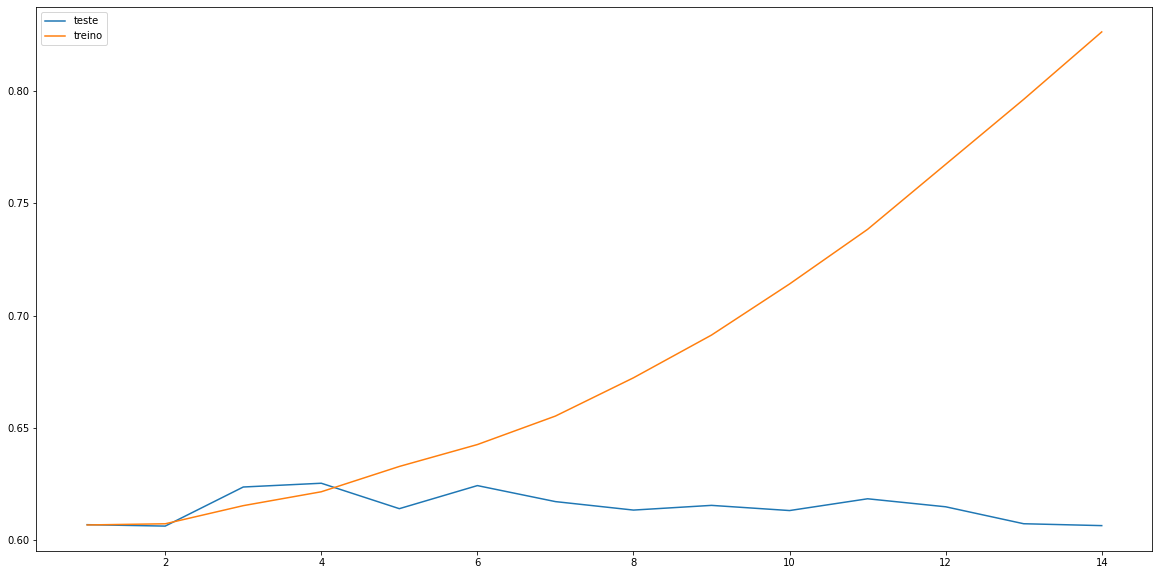

In [22]:
sns.lineplot(x = range(1,15), y = teste, label = 'teste')
sns.lineplot(x = range(1,15), y = treino, label = 'treino')


#dados de treino estão subindo, enquanto o treino descendo. Isso significa que o modelo estar overfiting

## Random Forest 

 cria várias arvores de decisão




In [39]:
from sklearn.ensemble import RandomForestClassifier
x = df_merge.select_dtypes('float64')
y =  df_merge['n_moa_ative']

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.2, random_state = 42, stratify = y)

modelo_randomforest = RandomForestClassifier()
modelo_randomforest.fit(x_treino, y_treino)
modelo_randomforest.score(x_teste, y_teste)


0.6487507873189167

### Acrescentando outras variaveis em X 

In [38]:
from sklearn.ensemble import RandomForestClassifier

x = df_merge.drop(['id', 'n_moa_ative', 'n_moa', 'droga'], axis = 1)
x = pd.get_dummies(x, columns = ['tratamento', 'dose', 'tempo'])
y =  df_merge['n_moa_ative']
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.2, random_state = 42, stratify = y)

modelo_randomforest = RandomForestClassifier()
modelo_randomforest.fit(x_treino, y_treino)
modelo_randomforest.score(x_teste, y_teste)


0.6857022884736511

# Plotando resultado dos modelos 

In [64]:
  print( '\nRandom Forest: {} '.format( random ), 
         '\nÁrvore de decisão: {}'.format( arvore ),
         '\nModelo simples: {}'.format( dummy ),
         '\nRegressão: {}'.format( regressao )
          )


Random Forest: 0.649  
Árvore de decisão: 0.606 
Modelo simples: 0.607 
Regressão: 0.635


In [63]:
random =  round(modelo_randomforest.score(x_teste, y_teste),3)
arvore = round(modelo_arvore.score(x_teste, y_teste),3)
dummy  = round(accuracy_score(y_teste, previsao_dummy),3)
regressao = round(modelo_rlogistica.score(x_teste, y_teste),3)
